## Project and Problem Statement :

- Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

- Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

- Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

`The company wants to know:`
- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import kruskal, levene
from statsmodels.graphics.gofplots import qqplot


In [22]:
df= pd.read_csv("Yulu electric vehicle dataset.csv")

In [23]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [24]:
df.tail()

datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

In [25]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 10886
Number of columns: 12


In [26]:
# checking for null values in each column
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

  *  **No null Values found**

In [27]:
# cheking for duplicate data
df.duplicated().sum()

0

* **no duplicate**

In [28]:
# cheking for unique values in each column\
df.nunique().sort_values(ascending= False)

datetime      10886
count           822
registered      731
casual          309
humidity         89
atemp            60
temp             49
windspeed        28
season            4
weather           4
holiday           2
workingday        2
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [30]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

## Observation:
*  datetime column showing object type which can be converted to datetime data type
*  Few categorical variable are of integer data type. It can be converted to categorical
*  maximum and minimum tempreture are 41 and 0.82 respectively, mean temp and median temp almost same so we can say there are no outliers
*  75% of times tempreture was upto approx. 26 celcius
*  maximum and minimum wind speed are 56.996900 and 0 respectively, mean wind speed and median wind speed almost same so we can say there are no outliers
*  Avg number of casual user is 36 which is less than avg registered user
* We can see that there are some days with no casual users and also some days without any registered users
* maximum casual users a days = 367
* maximum registered users a days = 886
* Maximum bikes rented a day are 977 and minimum is 1 with avg rented bikes =181

In [31]:
df["datetime"]= pd.to_datetime(df["datetime"])

In [32]:
columns= ["season","holiday","workingday", "weather"]
df[columns]=df[columns].astype('object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [34]:
df.describe(include= "all")

datetime   season  holiday  workingday  weather  \
count                           10886  10886.0  10886.0     10886.0  10886.0   
unique                            NaN      4.0      2.0         2.0      4.0   
top                               NaN      4.0      0.0         1.0      1.0   
freq                              NaN   2734.0  10575.0      7412.0   7192.0   
mean    2011-12-27 05:56:22.399411968      NaN      NaN         NaN      NaN   
min               2011-01-01 00:00:00      NaN      NaN         NaN      NaN   
25%               2011-07-02 07:15:00      NaN      NaN         NaN      NaN   
50%               2012-01-01 20:30:00      NaN      NaN         NaN      NaN   
75%               2012-07-01 12:45:00      NaN      NaN         NaN      NaN   
max               2012-12-19 23:00:00      NaN      NaN         NaN      NaN   
std                               NaN      NaN      NaN         NaN      NaN   

               temp         atemp      humidity     windspeed        casual  \
count   10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
unique          NaN           NaN           NaN           NaN           NaN   
top             NaN           NaN           NaN           NaN           NaN   
freq            NaN           NaN           NaN           NaN           NaN   
mean       20.23086     23.655084     61.886460     12.799395     36.021955   
min         0.82000      0.760000      0.000000      0.000000      0.000000   
25%        13.94000     16.665000     47.000000      7.001500      4.000000   
50%        20.50000     24.240000     62.000000     12.998000     17.000000   
75%        26.24000     31.060000     77.000000     16.997900     49.000000   
max        41.00000     45.455000    100.000000     56.996900    367.000000   
std         7.79159      8.474601     19.245033      8.164537     49.960477   

          registered         count  
count   10886.000000  10886.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean      155.552177    191.574132  
min         0.000000      1.000000  
25%        36.000000     42.000000  
50%       118.000000    145.000000  
75%       222.000000    284.000000  
max       886.000000    977.000000  
std       151.039033    181.144454

### observation after changing data types of some columns:
* From above most occured season is 4 i.e. winter
* Total working days are 7412 and remaining days are either holidays or weekend
* Mostly occured weather is 1(Clear, Few clouds, partly cloudy, partly cloudy) with frequency of 7192.
* First and last date in dataset are 2011-01-01 and 2012-12-19

In [35]:
df["yr-month"]= df["datetime"].dt.to_period("M")

In [36]:
df.head()

datetime season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1       0          0       1  9.84  14.395   
1 2011-01-01 01:00:00      1       0          0       1  9.02  13.635   
2 2011-01-01 02:00:00      1       0          0       1  9.02  13.635   
3 2011-01-01 03:00:00      1       0          0       1  9.84  14.395   
4 2011-01-01 04:00:00      1       0          0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count yr-month  
0        81        0.0       3          13     16  2011-01  
1        80        0.0       8          32     40  2011-01  
2        80        0.0       5          27     32  2011-01  
3        75        0.0       3          10     13  2011-01  
4        75        0.0       0           1      1  2011-01

In [37]:
monthly= df.groupby("yr-month")[["casual", "registered", "count"]].sum()
monthly.head()

casual  registered  count
yr-month                           
2011-01     2008       21544  23552
2011-02     3776       29068  32844
2011-03     7910       30825  38735
2011-04    12229       38288  50517
2011-05    15865       63848  79713

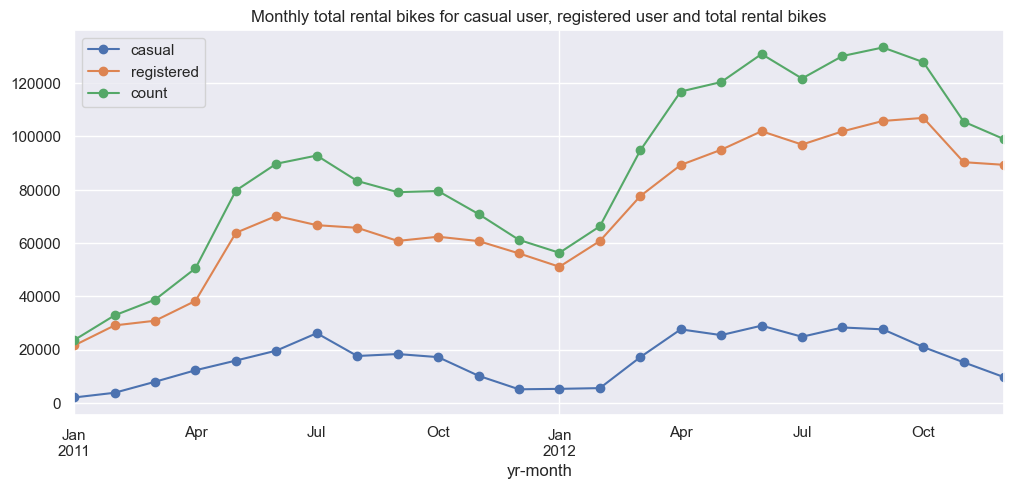

In [38]:
# Total monthly values for casual, registered and count variable for easy comparision over the time period

plt.figure(figsize = (12,5))
sns.set_theme(style= "darkgrid")
plt.subplot(1,1,1)
monthly["casual"].plot(kind="line", marker= "o", legend="casual")
monthly["registered"].plot(kind="line", marker= "o",legend="registered")
monthly["count"].plot(kind="line", marker= "o", legend= "count")
plt.title("Monthly total rental bikes for casual user, registered user and total rental bikes")

plt.show()

* As we can see over the time period, in year 2012 more count of bikes rented compare to year 2011
* In year 2012 from march to november we can see good increase in renting bikes

In [39]:
# gettting all data from year 2011
yr_2011= df.loc[df["datetime"].dt.year == 2011]
yr_2011.shape

(5422, 13)

In [40]:
yr_2011.describe()

datetime         temp        atemp     humidity  \
count                        5422  5422.000000  5422.000000  5422.000000   
mean   2011-06-27 03:11:14.585024    19.751988    23.157086    63.405017   
min           2011-01-01 00:00:00     2.460000     3.030000     0.000000   
25%           2011-04-02 08:15:00    13.120000    15.910000    49.000000   
50%           2011-07-01 20:30:00    19.680000    23.485000    64.000000   
75%           2011-10-01 10:45:00    26.240000    31.060000    79.000000   
max           2011-12-19 23:00:00    38.540000    43.940000   100.000000   
std                           NaN     7.951694     8.619132    19.780518   

         windspeed       casual   registered        count  
count  5422.000000  5422.000000  5422.000000  5422.000000  
mean     12.924144    28.737920   115.485430   144.223349  
min       0.000000     0.000000     0.000000     1.000000  
25%       7.001500     3.000000    27.000000    32.000000  
50%      12.998000    13.000000    91.000000   111.000000  
75%      19.001200    38.000000   168.000000   210.000000  
max      56.996900   272.000000   567.000000   638.000000  
std       8.354137    39.554419   108.847868   133.312123

* avg count of bikes for year 2011 is 144
* 75% of the time tempreture in 2011 is below 27

In [41]:
# gettting all data from year 2012
yr_2012= df.loc[df["datetime"].dt.year == 2012]
yr_2012.shape

(5464, 13)

In [42]:
yr_2012.describe()

datetime         temp        atemp     humidity  \
count                           5464  5464.000000  5464.000000  5464.000000   
mean   2012-06-25 22:54:38.477306112    20.706051    24.149254    60.379575   
min              2012-01-01 00:00:00     0.820000     0.760000    16.000000   
25%              2012-04-01 02:45:00    14.760000    17.425000    46.000000   
50%              2012-07-01 02:30:00    21.320000    24.240000    60.000000   
75%              2012-10-01 00:15:00    27.060000    31.060000    76.000000   
max              2012-12-19 23:00:00    41.000000    45.455000   100.000000   
std                              NaN     7.600352     8.300001    18.578008   

         windspeed       casual   registered        count  
count  5464.000000  5464.000000  5464.000000  5464.000000  
mean     12.675605    43.250000   195.310944   238.560944  
min       0.000000     0.000000     1.000000     1.000000  
25%       7.001500     5.000000    51.000000    59.000000  
50%      11.001400    20.000000   161.000000   199.000000  
75%      16.997900    61.000000   281.000000   354.000000  
max      47.998800   367.000000   886.000000   977.000000  
std       7.970774    57.584101   174.709050   208.114003

* avg count of bikes for year 2012 is 238, which is more compare to 2011
* 75% of the time tempreture in 2012 is below 27

## Univariate Analysis

In [43]:
season= df["season"].value_counts()
season

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

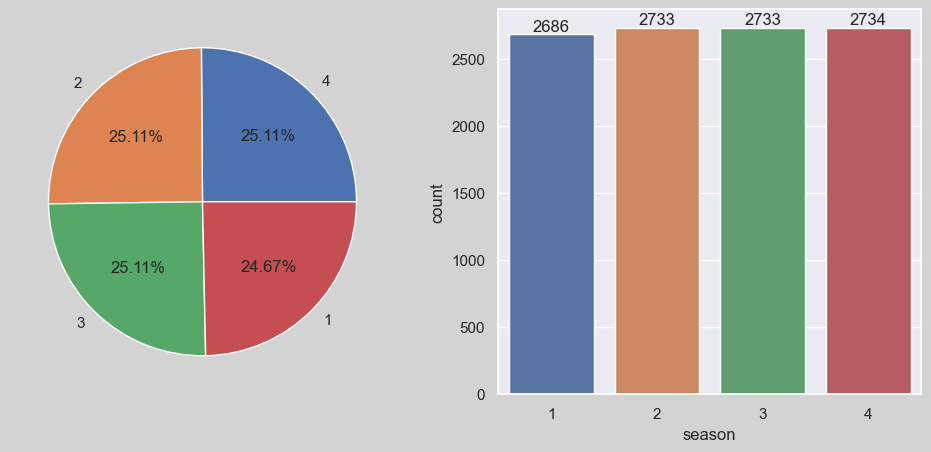

In [44]:
# distribution of season in the dataset
plt.figure(figsize = (12,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
plt.pie(season, labels= season.index, autopct='%.2f%%' )

plt.subplot(1,2,2)
label= sns.countplot(data= df, x= "season")
for i in label.containers:
  label.bar_label(i)

plt.show()

* we can see in all season number of renting days are almost equal

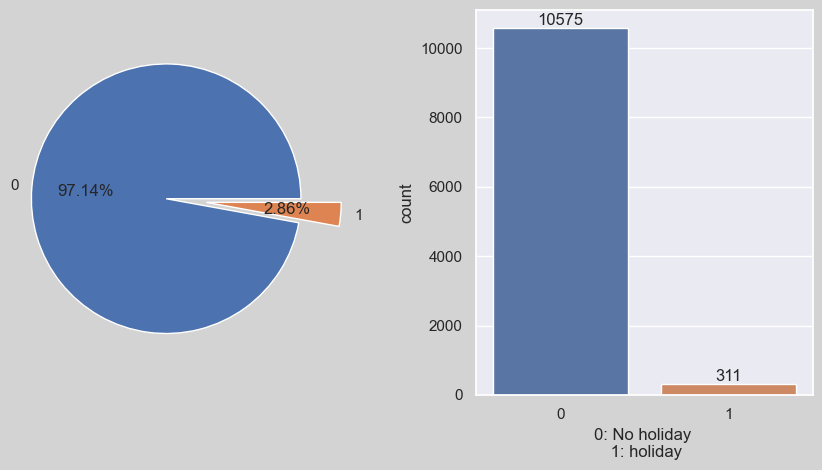

In [45]:
# distribution of holiday in the dataset
plt.figure(figsize = (10,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
plt.subplots_adjust(wspace= 0.3, hspace= 0.3)
plt.pie(df["holiday"].value_counts(), labels= df["holiday"].value_counts().index, autopct='%.2f%%', explode = (0.30,0) )



plt.subplot(1,2,2)
label= sns.countplot(data= df, x= "holiday")
plt.xlabel("0: No holiday \n 1: holiday")
for i in label.containers:
  label.bar_label(i)

plt.show()

*  number of holidays are only 2.86%

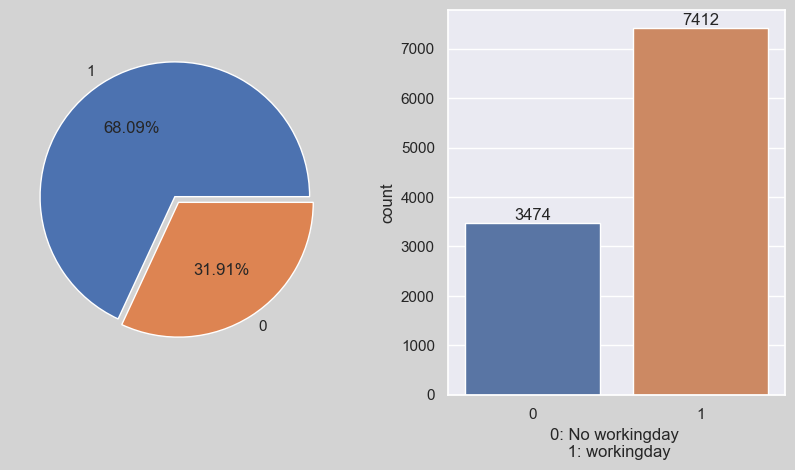

In [46]:
# distribution of workingday in the dataset
plt.figure(figsize = (10,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
plt.subplots_adjust(wspace= 0.3)
plt.pie(df["workingday"].value_counts(), labels= df["workingday"].value_counts().index, autopct='%.2f%%', explode = (0.05,0) )



plt.subplot(1,2,2)
label= sns.countplot(data= df, x= "workingday")
plt.xlabel("0: No workingday \n 1: workingday")
for i in label.containers:
  label.bar_label(i)

plt.show()

*  68% are Working days

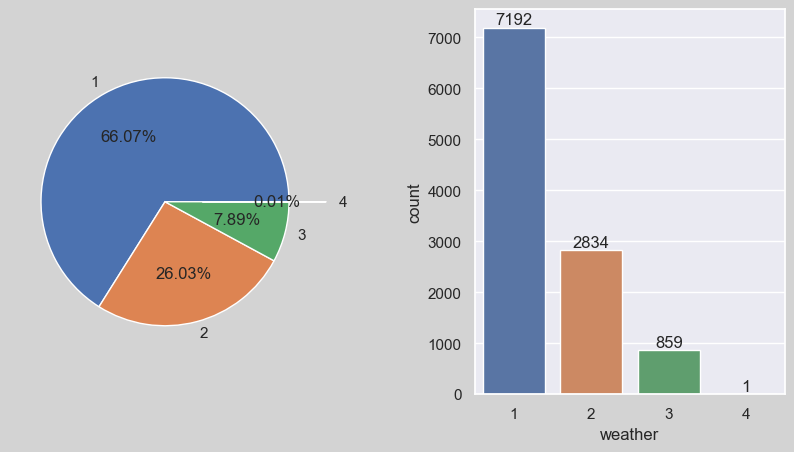

In [47]:
# distribution of weather in the dataset

plt.figure(figsize = (10,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
plt.subplots_adjust(wspace= 0.5)
plt.pie(df["weather"].value_counts(), labels= df["weather"].value_counts().index, autopct='%.2f%%', explode = (0,0,0,0.30) )



plt.subplot(1,2,2)
label= sns.countplot(data= df, x= "weather")
for i in label.containers:
  label.bar_label(i)

plt.show()

*  Mostly observed weather is 1 i.e. Clear, Few clouds, partly cloudy or partly cloudy   (66%)
*  Almost never seen weather is 4 i.e.  Heavy Rain + Ice Pallets + Thunderstorm + Mist or Snow + Fog  (0.01%)

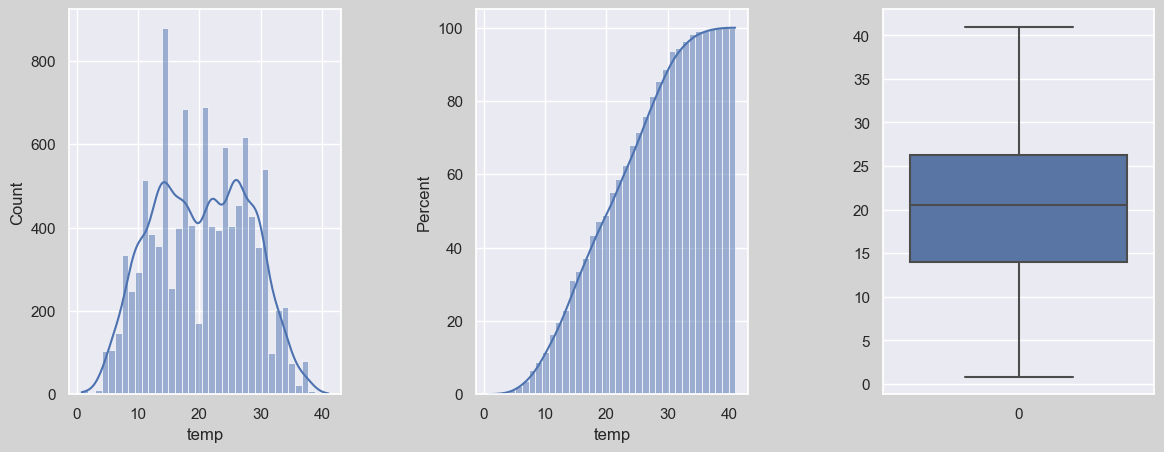

In [48]:
# distribution of Tempreture in the dataset and cumulative distribution of tempreture
plt.figure(figsize = (14,5)).set_facecolor("lightgrey")
plt.subplots_adjust(wspace= 0.5)
plt.subplot(1,3,1)
sns.histplot(df["temp"], kde= True)

plt.subplot(1,3,2)
sns.histplot(df["temp"], cumulative= True, stat= "percent", kde= True)

plt.subplot(1,3,3)
sns.boxplot(df["temp"])

plt.show()

In [49]:
mean_temp= df["temp"].mean()
median_temp= df["temp"].median()
round(mean_temp,2), median_temp

(20.23, 20.5)

*   We can see in above plot there are no outliers in Tempreture
*   Tempreture is distributed from 0 to 40
*   median and mean are almost same
*   More than 80 % of the time, the temperature is less than 28 degrees celcius.

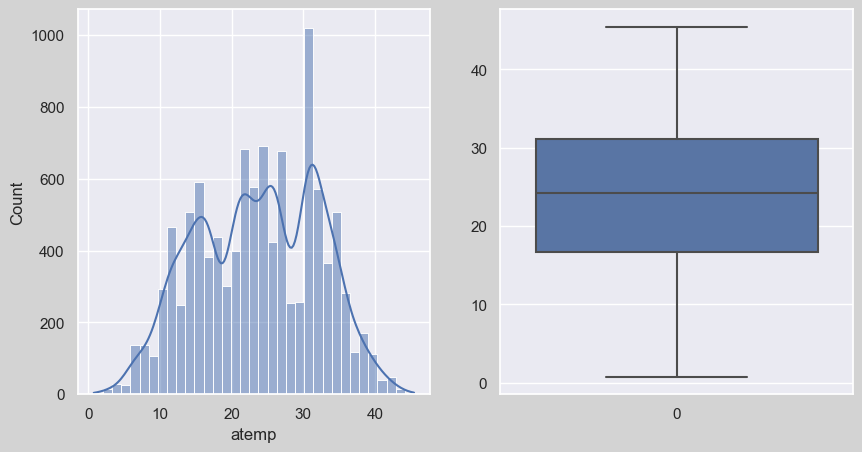

In [50]:
# distribution of atemp in the dataset and cumulative distribution of atemp
plt.figure(figsize = (10,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
sns.histplot(df["atemp"], kde= True)

plt.subplot(1,2,2)
sns.boxplot(df["atemp"])

plt.show()

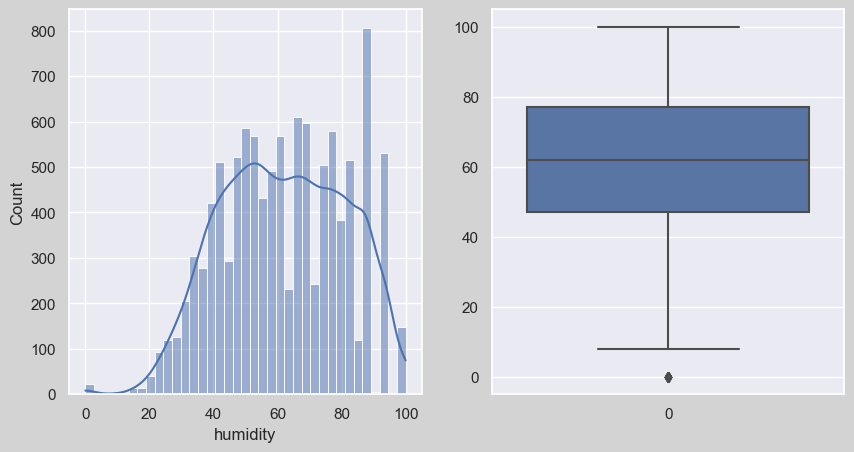

In [51]:
# distribution of humidity in the dataset and cumulative distribution of humidity
plt.figure(figsize = (10,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
sns.histplot(df["humidity"], kde= True)

plt.subplot(1,2,2)
sns.boxplot(df["humidity"])

plt.show()

* There are outliers in humidity

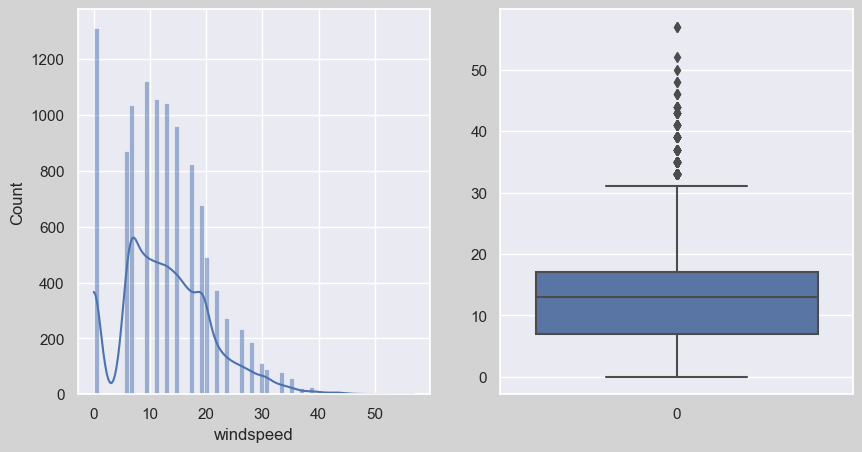

In [52]:
# distribution of windspeed in the dataset and cumulative distribution of windspeed

plt.figure(figsize = (10,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
sns.histplot(df["windspeed"], kde= True)

plt.subplot(1,2,2)
sns.boxplot(df["windspeed"])

plt.show()

* There are outliers in windspeed

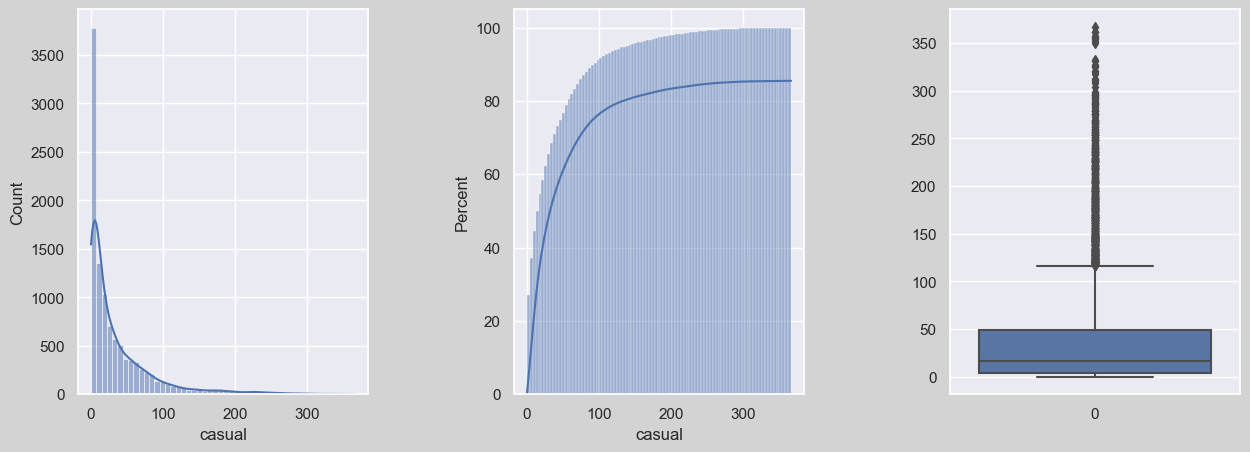

In [53]:
# histoplot for casual feature in the dataset and cumulative distribution of casual feature

plt.figure(figsize = (15,5)).set_facecolor("lightgrey")
plt.subplots_adjust(wspace= 0.5)

plt.subplot(1,3,1)
sns.histplot(df["casual"], kde= True, bins= 50)

plt.subplot(1,3,2)
sns.histplot(df["casual"], cumulative= True, stat= "percent", kde= True)

plt.subplot(1,3,3)
sns.boxplot(df["casual"])

plt.show()

*   More than 80 % of the time, the count of casual users is less than 60.

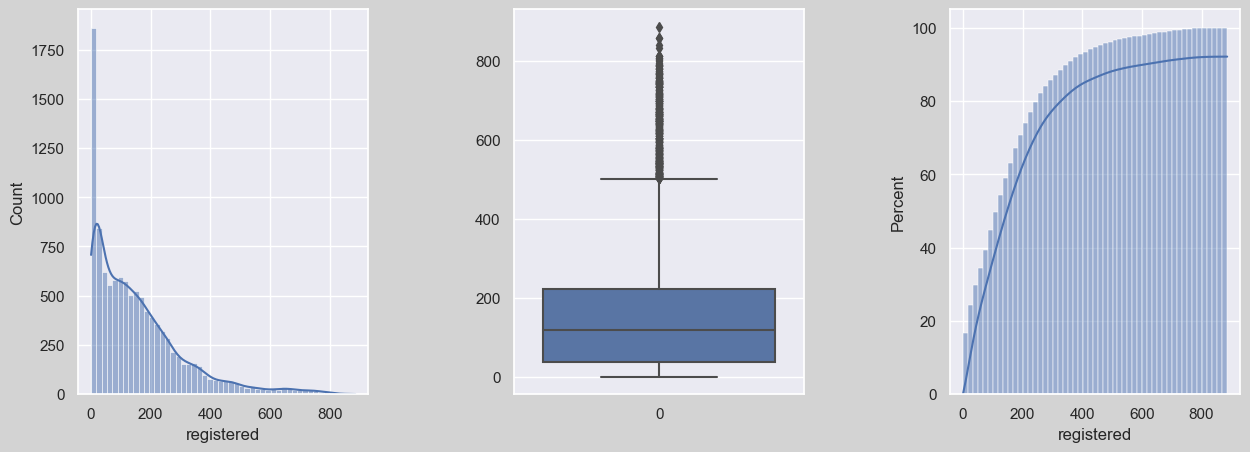

In [54]:
# histoplot for registred feature in the dataset and cumulative distribution of registred feature

plt.figure(figsize = (15,5)).set_facecolor("lightgrey")
plt.subplots_adjust(wspace= 0.5)
plt.subplot(1,3,1)
sns.histplot(df["registered"], kde= True, bins= 50)
plt.subplot(1,3,3)
sns.histplot(df["registered"], cumulative= True, stat= "percent", kde= True)

plt.subplot(1,3,2)
sns.boxplot(df["registered"])

plt.show()

*   More than 85 % of the time, the count of registered users is less than 300.

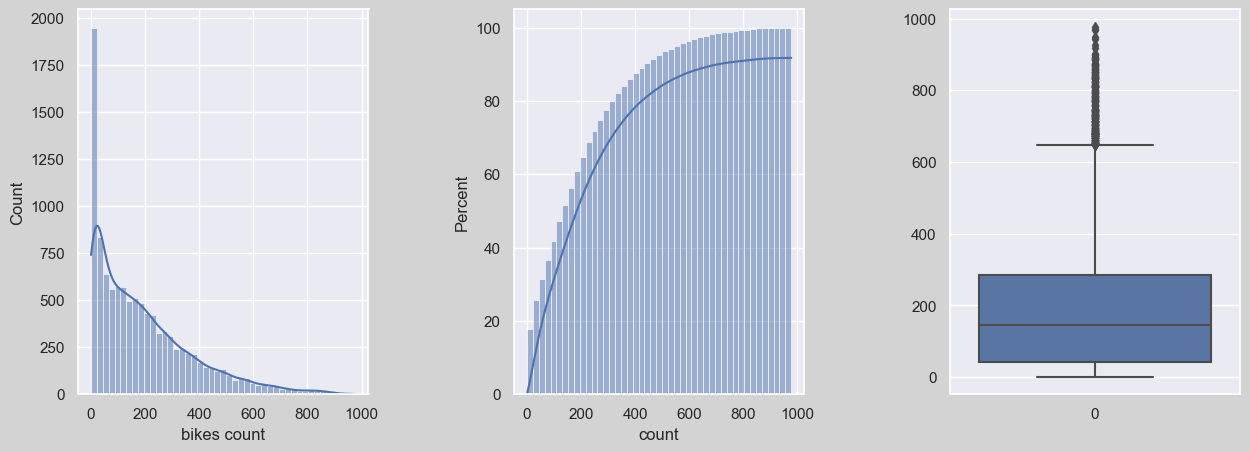

In [55]:
plt.figure(figsize = (15,5)).set_facecolor("lightgrey")
plt.subplots_adjust(wspace= 0.5)
plt.subplot(1,3,1)
sns.histplot(df["count"], kde= True)
plt.xlabel("bikes count")

plt.subplot(1,3,2)
sns.histplot(df["count"], cumulative= True, stat= "percent", kde= True)

plt.subplot(1,3,3)
sns.boxplot(df["count"])

plt.show()

* We can observe outliers in casual user, registered user and total bikes rented count cloumn and all three of these are following right skewness

## Bivariate Analysis

In [56]:
df.groupby("workingday")['count'].sum()

workingday
0     654872
1    1430604
Name: count, dtype: int64

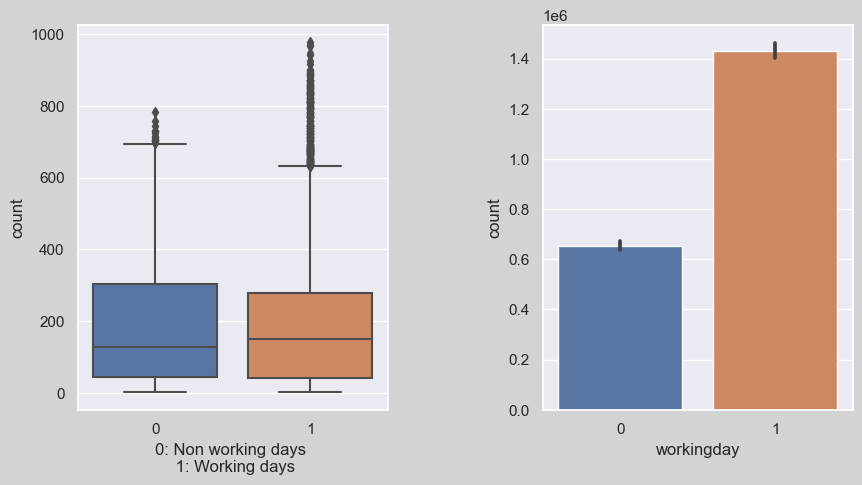

In [57]:
# Bivariate analysis on counts of bikes rented vs working day

plt.figure(figsize = (10,5)).set_facecolor("lightgrey")
plt.subplots_adjust(wspace= 0.5)
plt.subplot(1,2,1)
sns.boxplot(y=df["count"],x= df["workingday"])
plt.xlabel("0: Non working days \n 1: Working days")

plt.subplot(1,2,2)
sns.barplot(data= df, x= "workingday", y= "count", estimator="sum")
plt.show()

  * we can se median value for both working and non working day are sligtly diffrent, On working day more bikes are rented.
  * In case of working day there are more outliers compare to non working days
  * In overall on working day we can see more bikes are rented

In [58]:
df["count"].sum()

2085476

In [59]:
# Analysis on Season vs count
df.groupby("season")["count"].sum()

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

In [60]:
df.groupby("season")["count"].describe()

count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

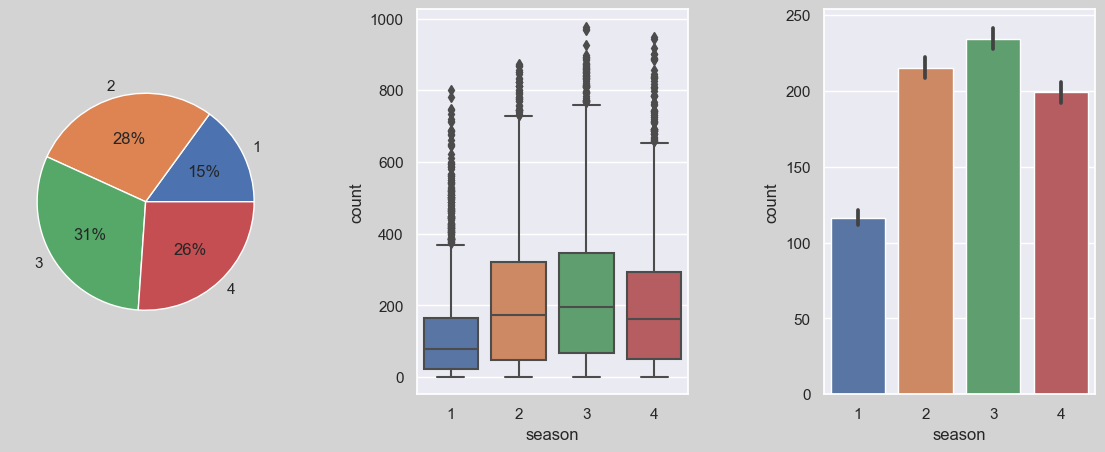

In [61]:
plt.figure(figsize = (14,5)).set_facecolor("lightgrey")
plt.subplots_adjust(wspace= 0.5)
plt.subplot(1,3,2)
sns.boxplot(y=df["count"],x= df["season"])

plt.subplot(1,3,3)
sns.barplot(data= df, x= "season", y= "count", estimator="mean")

plt.subplot(1,3,1)
plt.pie(df.groupby("season")["count"].sum(), labels= df.groupby("season")["count"].sum().index, autopct='%.0f%%')
plt.show()

#(1: spring, 2: summer, 3: fall, 4: winter)

  
  * we can see in season 3 (Fall) more number of bikes are rented compare to other season
  * In season 1 (spring) less number of bikes are rented
  * outliers are seen in all season

In [62]:
# Analysis on weather vs count of bike rented

df.groupby("weather")["count"].sum()

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

In [63]:
df.groupby("weather")["count"].describe()

count        mean         std    min    25%    50%    75%    max
weather                                                                   
1        7192.0  205.236791  187.959566    1.0   48.0  161.0  305.0  977.0
2        2834.0  178.955540  168.366413    1.0   41.0  134.0  264.0  890.0
3         859.0  118.846333  138.581297    1.0   23.0   71.0  161.0  891.0
4           1.0  164.000000         NaN  164.0  164.0  164.0  164.0  164.0

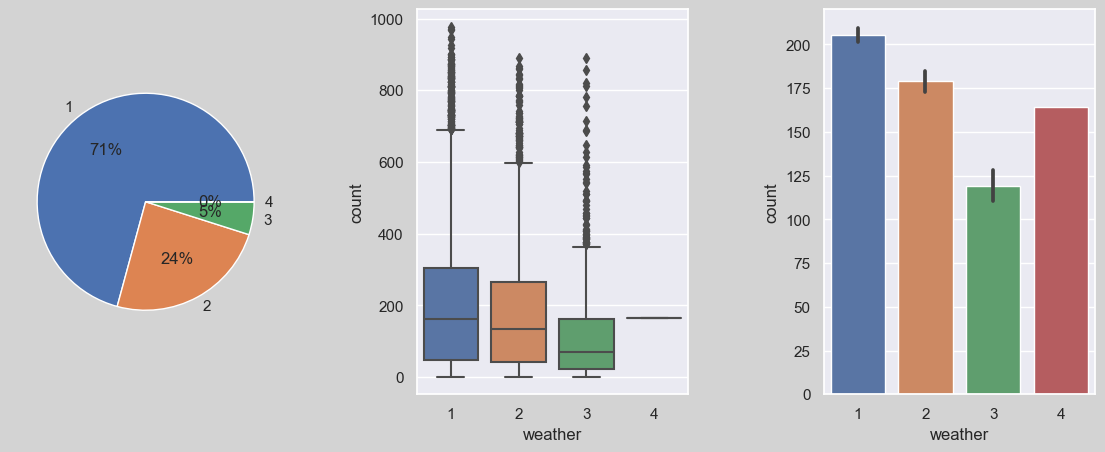

In [64]:
plt.figure(figsize = (14,5)).set_facecolor("lightgrey")
plt.subplots_adjust(wspace= 0.5)
plt.subplot(1,3,2)
sns.boxplot(y=df["count"],x= df["weather"])

plt.subplot(1,3,3)
sns.barplot(data= df, x= "weather", y= "count", estimator="mean")

plt.subplot(1,3,1)
plt.pie(df.groupby("weather")["count"].sum(), labels= df.groupby("weather")["count"].sum().index, autopct='%.0f%%')
plt.show()

In [65]:
df.loc[df["weather"]==4]

datetime season holiday workingday weather  temp   atemp  \
5631 2012-01-09 18:00:00      1       0          1       4   8.2  11.365   

      humidity  windspeed  casual  registered  count yr-month  
5631        86     6.0032       6         158    164  2012-01

*   The weather 4(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) is seen only for once, but still we can see there are good count of rented bikes
*   In weather 1 ( Clear, Few clouds, partly cloudy, partly cloudy )most number of bikes are rented.
* Outliers can be seen in weather 1, 2 and 3.

## Multi-variate analysis

<Axes: xlabel='weather', ylabel='count'>

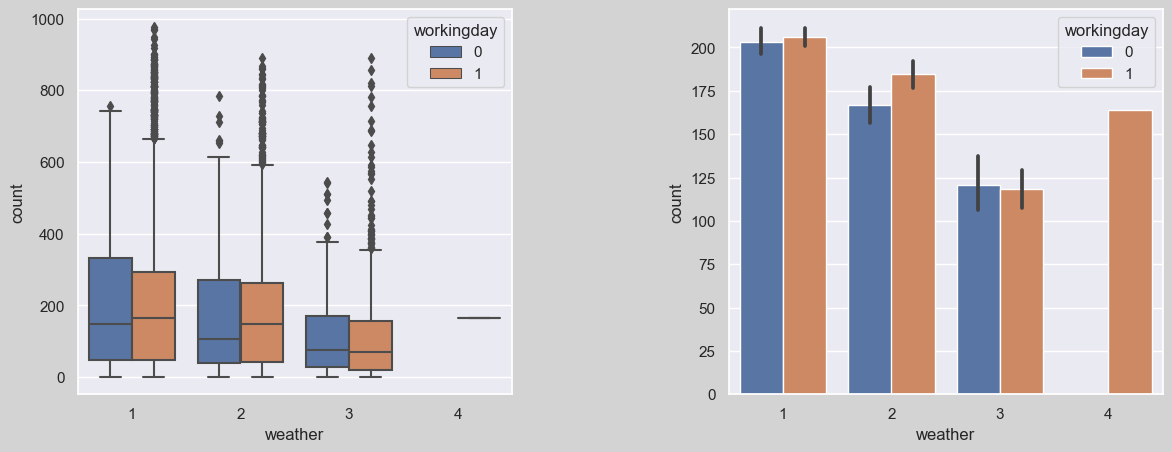

In [66]:
# visual analysis on count of rented bikes on diff weather on workingday

plt.figure(figsize = (14,5)).set_facecolor("lightgrey")
plt.subplots_adjust(wspace= 0.5)
plt.subplot(1,2,1)
sns.boxplot(y=df["count"],x= df["weather"], hue= df["workingday"])

plt.subplot(1,2,2)
sns.barplot(data= df, x= "weather", y= "count",hue= "workingday" ,estimator="mean")

<Axes: xlabel='season', ylabel='count'>

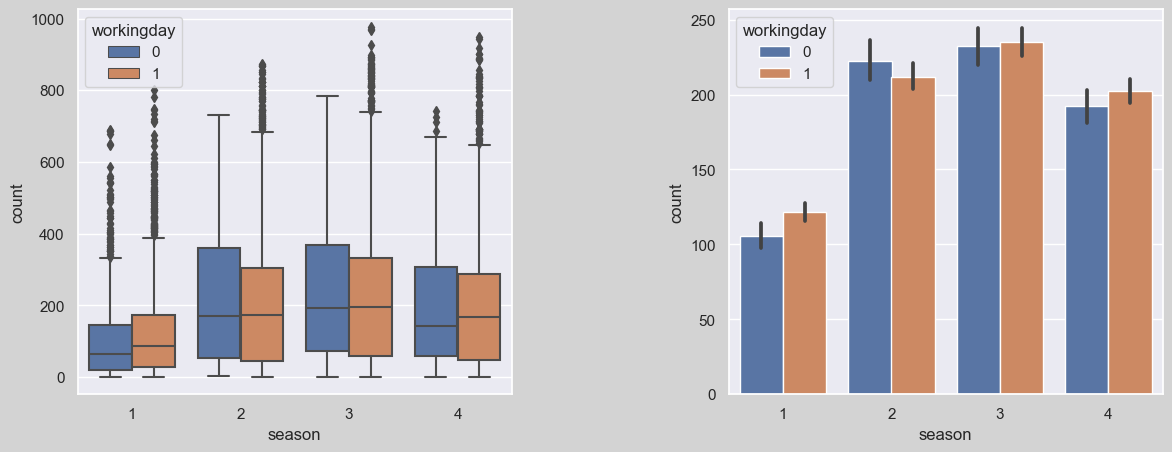

In [67]:
# visual analysis on count of rented bikes on diff season on workingday and non working day

plt.figure(figsize = (14,5)).set_facecolor("lightgrey")
plt.subplots_adjust(wspace= 0.5)
plt.subplot(1,2,1)
sns.boxplot(y=df["count"],x= df["season"], hue= df["workingday"])

plt.subplot(1,2,2)
sns.barplot(data= df, x= "season", y= "count",hue= "workingday" ,estimator="mean")

<Axes: >

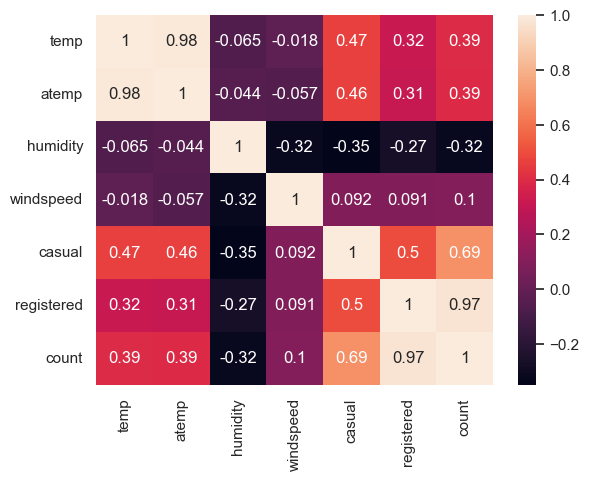

In [68]:
# correlation of numeric values in dataset
sns.heatmap(df.corr(numeric_only= True), annot=True)

*  windspeed and tempreture have low positive correlation with count of bikes remted
*  humidity have high negative correlation with count of rented bikes

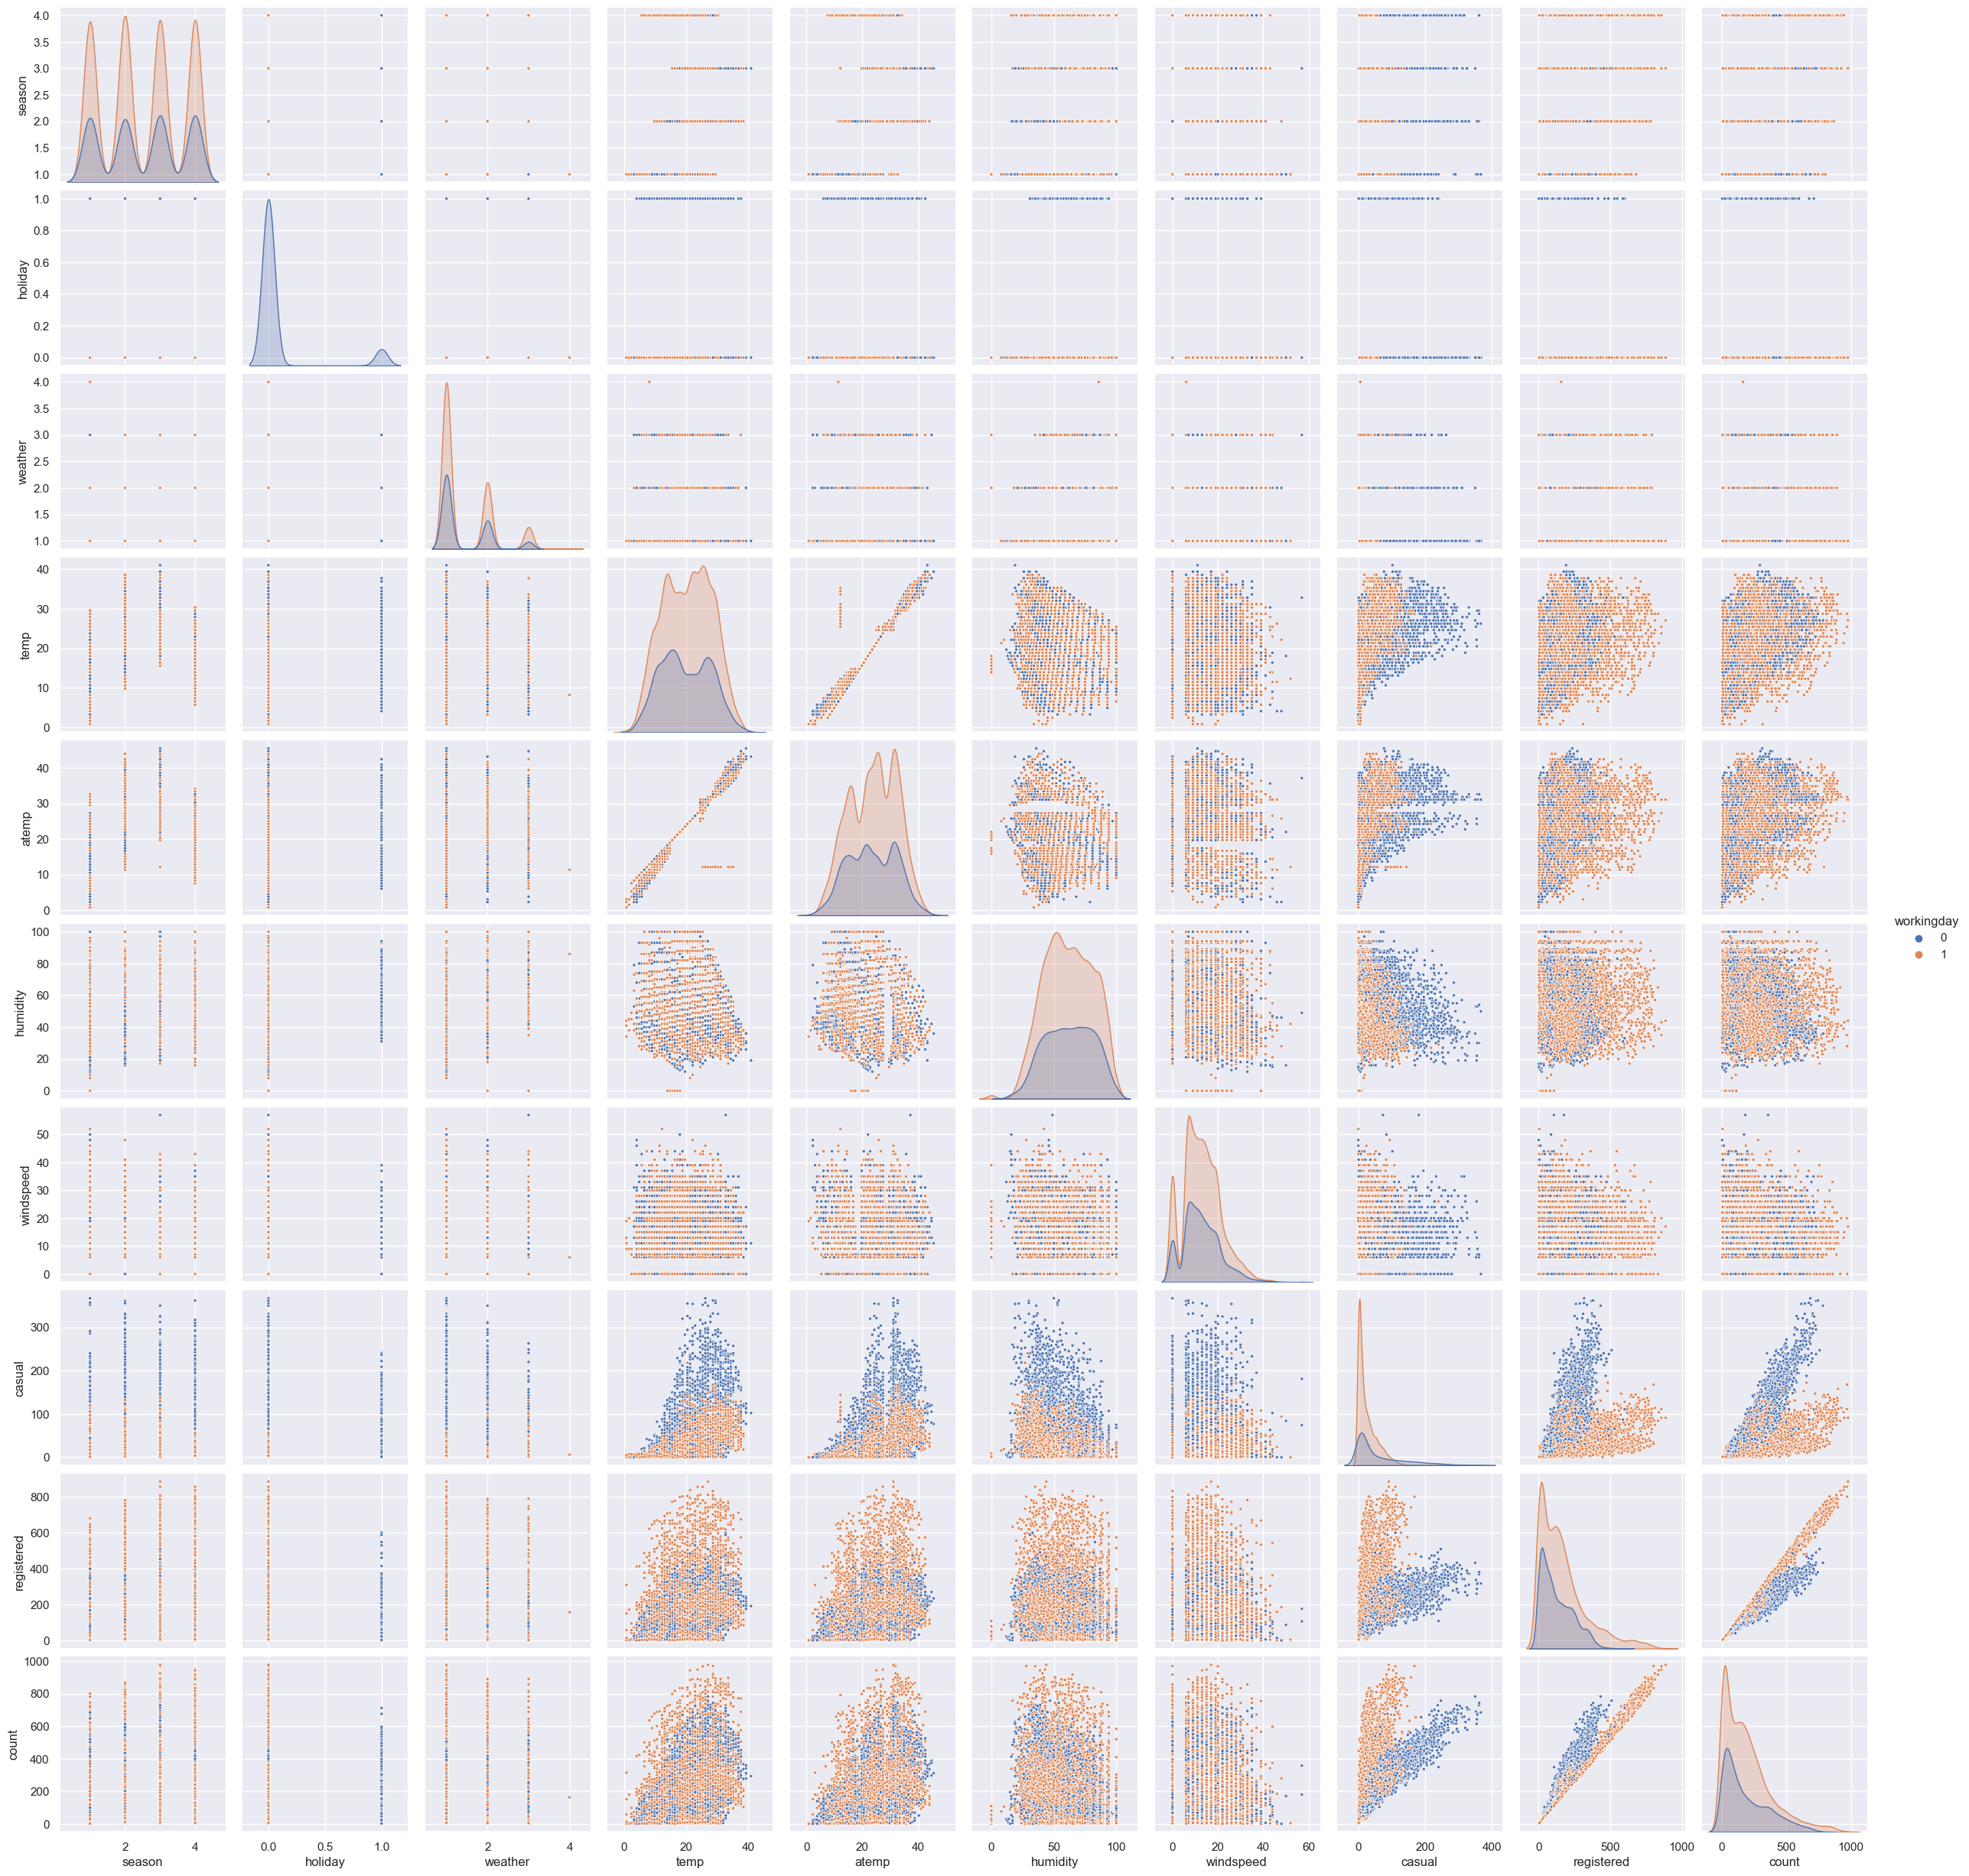

In [70]:
sns.pairplot(df,
             hue = 'workingday',
             markers = '.')
plt.show()

## Hypothesis Testing 1
  

 *   **Is there any effect of Working Day on the number of electric cycles rented ?**




In [71]:
df.groupby("workingday")["count"].describe()

count        mean         std  min   25%    50%    75%    max
workingday                                                                
0           3474.0  188.506621  173.724015  1.0  44.0  128.0  304.0  783.0
1           7412.0  193.011873  184.513659  1.0  41.0  151.0  277.0  977.0

In [72]:
workingday= df.loc[df["workingday"]==1]
workingday.shape

(7412, 13)

In [73]:
workingday.head()

datetime season holiday workingday weather  temp  atemp  \
47 2011-01-03 00:00:00      1       0          1       1  9.02  9.850   
48 2011-01-03 01:00:00      1       0          1       1  8.20  8.335   
49 2011-01-03 04:00:00      1       0          1       1  6.56  6.820   
50 2011-01-03 05:00:00      1       0          1       1  6.56  6.820   
51 2011-01-03 06:00:00      1       0          1       1  5.74  5.305   

    humidity  windspeed  casual  registered  count yr-month  
47        44    23.9994       0           5      5  2011-01  
48        44    27.9993       0           2      2  2011-01  
49        47    26.0027       0           1      1  2011-01  
50        47    19.0012       0           3      3  2011-01  
51        50    26.0027       0          30     30  2011-01

In [74]:
non_workingday= df.loc[df["workingday"]==0]
non_workingday.shape

(3474, 13)

In [75]:
non_workingday.head()

datetime season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1       0          0       1  9.84  14.395   
1 2011-01-01 01:00:00      1       0          0       1  9.02  13.635   
2 2011-01-01 02:00:00      1       0          0       1  9.02  13.635   
3 2011-01-01 03:00:00      1       0          0       1  9.84  14.395   
4 2011-01-01 04:00:00      1       0          0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count yr-month  
0        81        0.0       3          13     16  2011-01  
1        80        0.0       8          32     40  2011-01  
2        80        0.0       5          27     32  2011-01  
3        75        0.0       3          10     13  2011-01  
4        75        0.0       0           1      1  2011-01

  * **Ho : Working day does not have any effect on electric cycle rented**
  * **Ha : Working day has some effect on electric cycle rented**

* before doing T-test_ind we need to check assuption such as if it follows gaussian distribution, equal variance.

*  Visual Tests to know if the samples follow normal distribution

[]

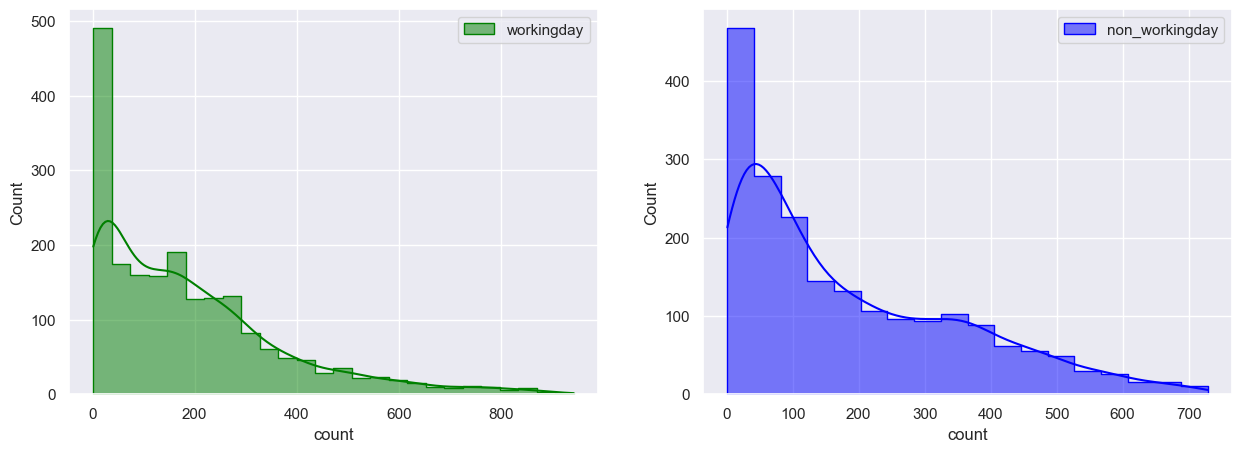

In [76]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(2000),
             element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(2000),
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

*  the above plot do not follow normal distribution.

*   **Distribution check using QQ Plot**

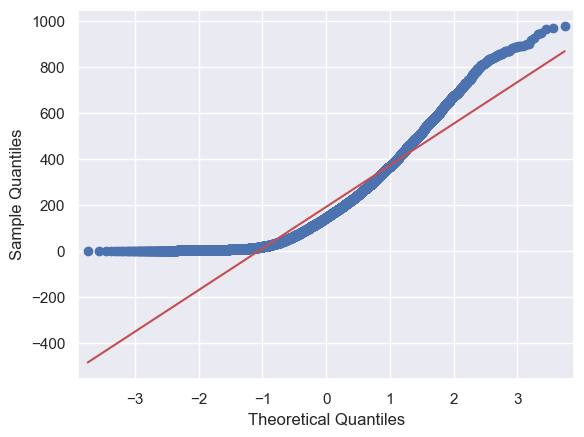

In [78]:

qqplot(df["count"], line="s")
plt.show()

*   we can see in the above plot that the distributions do not follow guassian distribution.

checking if gaussian with **shapiro test**
* H0 : Data is Gaussian
* Ha : Data is not Gaussian


In [79]:
#Shapiro
from scipy.stats import shapiro

In [80]:
count_subset= df["count"].sample(100)          # taking random sample of size 100
# setting significance = 0.05

In [81]:
test_stat, p_value = shapiro(count_subset)
print(p_value)

3.186858776871304e-08


In [82]:
if p_value<0.05:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

Data is not Gaussian


*  after performing shapiro test it is clear that data is not gaussian

* checking variance using levene test

In [84]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(workingday["count"], non_workingday["count"] )
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("variance are equal")

0.9437823280916695
variance are equal


* since distribution is not guassian so we cannot perform T-test, so now we will perform Kruskal Wallis test

In [86]:
# Ho : Working day does not have any effect on Avg no. of electric cycle rented, Fail to reject NUll hypothesis
# Ha : Working day has some effect on Avg no. of electric cycle rented, Reject Ho

stat, pval= kruskal(workingday["count"], non_workingday["count"])
print(pval)

if pval<0.05:
  print("Working day has some effect on electric cycle rented, Reject Ho")
else:
  print("Working day does not have any effect on Avg no. of electric cycle rented, Fail to reject NUll hypothesis")


0.9679113872727798
Working day does not have any effect on Avg no. of electric cycle rented, Fail to reject NUll hypothesis


* **with above test we can conclude Working day does not have any effect on electric cycle rented**

## Hypothesis Testing 2

  * **Is no. of cycles rented similar or different in different weather?**

In [87]:
df.groupby("weather")["count"].describe()

count        mean         std    min    25%    50%    75%    max
weather                                                                   
1        7192.0  205.236791  187.959566    1.0   48.0  161.0  305.0  977.0
2        2834.0  178.955540  168.366413    1.0   41.0  134.0  264.0  890.0
3         859.0  118.846333  138.581297    1.0   23.0   71.0  161.0  891.0
4           1.0  164.000000         NaN  164.0  164.0  164.0  164.0  164.0

* 1: Clear, Few clouds, partly cloudy, partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [88]:
weather1= df.loc[df["weather"]== 1]
weather2= df.loc[df["weather"]== 2]
weather3= df.loc[df["weather"]== 3]
weather4= df.loc[df["weather"]== 4]
len(weather1), len(weather2), len(weather3), len(weather4)

(7192, 2834, 859, 1)

* **as we can see there is only one data point for weather 4 so we will not consider weather 4**
* **we cannot perform a ANOVA test with a single data point for a group**
* **We set our alpha to be 0.05 (significance level)**

[]

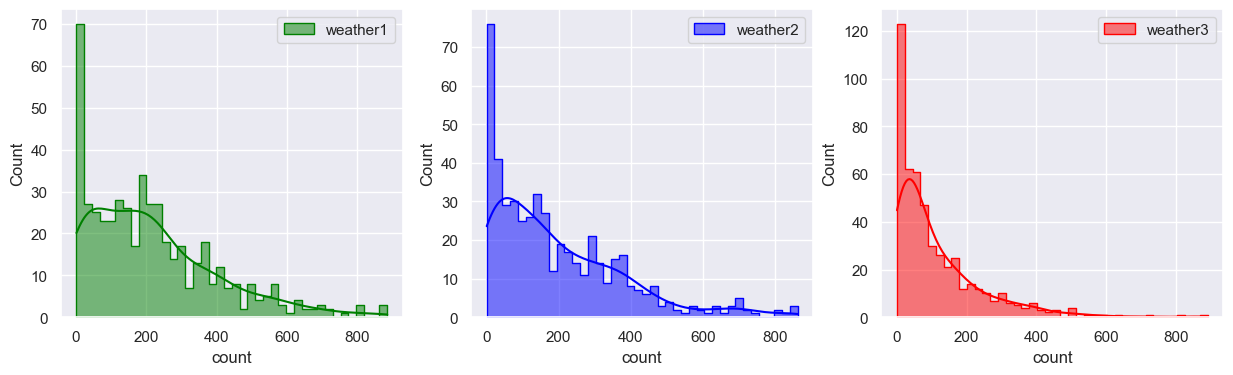

In [89]:
# Visual Tests to know if the samples follow normal distribution
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(weather1.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()

* **checking the assuption if distribution follow gaussian**

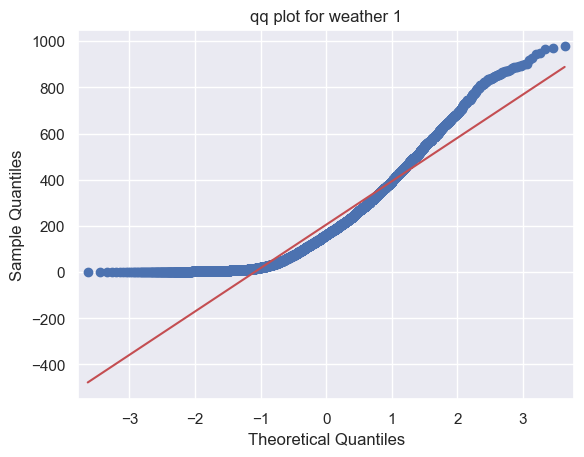

In [90]:
qqplot(weather1["count"], line="s")
plt.title("qq plot for weather 1")
plt.show()

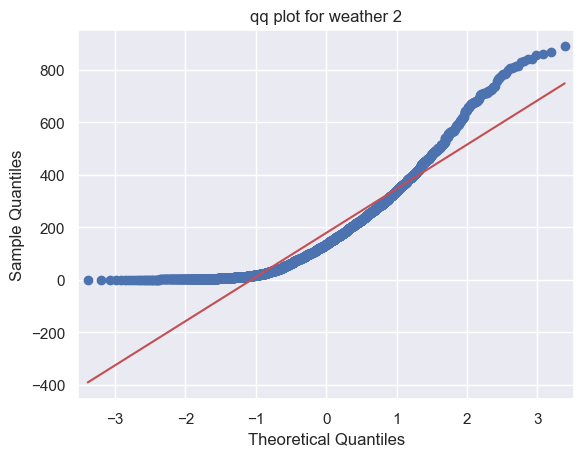

In [91]:
qqplot(weather2["count"], line="s")
plt.title("qq plot for weather 2")
plt.show()

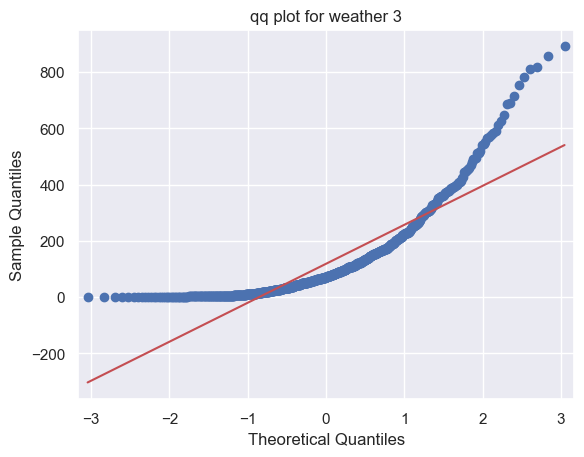

In [92]:
qqplot(weather3["count"], line="s")
plt.title("qq plot for weather 3")
plt.show()

* **from above three qqplot we can see distribution is not gaussian**

**shapiro test**

In [93]:
# for weather 1
# checking if gaussian with shapiro test
# setting significance = 0.05

# H0 : Data is Gaussian
# Ha : Data is not Gaussian
count_subset= weather1["count"].sample(100)          # taking random sample of size 100

test_stat, p_value = shapiro(count_subset)
print(p_value)
if p_value<0.05:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

1.2176537893537898e-06
Data is not Gaussian


In [94]:
# for weather 2
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
count_subset= weather2["count"].sample(100)          # taking random sample of size 100

test_stat, p_value = shapiro(count_subset)
print(p_value)
if p_value<0.05:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

8.699057474359506e-08
Data is not Gaussian


In [95]:
# for weather 3
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
count_subset= weather3["count"].sample(100)          # taking random sample of size 100

test_stat, p_value = shapiro(count_subset)
print(p_value)
if p_value<0.05:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

3.678717486882421e-12
Data is not Gaussian


*  **Checking Homogeneity of variance using Levene's test**

In [96]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(weather1["count"], weather2["count"], weather3["count"] )
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("variance are equal")

6.198278710731511e-36
Variances are not equal


*  from above all test it is clear that data is not normally distributed.
*  does not have the same variance.
*  we cannot perform annova test.
*  We can Kruskal-Wallis test for independent samples.

In [97]:
# Ho : Avg no. of cycles rented is same for different weather, Fail to reject NUll hypothesis.
# Ha :  AVg no. of cycles rented is different for different weather, Reject Ho.

stat, pval= kruskal(weather1["count"], weather2["count"], weather3["count"] )
print(pval)

if pval<0.05:
  print(" AVg no. of cycles rented is different for different weather, Null hypothesis Rejected")
else:
  print("Avg no. of cycles rented is same for different weather, Fail to reject NUll hypothesis")


3.122066178659941e-45
 AVg no. of cycles rented is different for different weather, Null hypothesis Rejected


* Hence the average number of rental bikes is statistically different for different weathers.

## Hypothesis Testing 3

  * **Is no. of cycles rented similar or different in different season?**

In [98]:
df.groupby("season")["count"].describe()

count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

*  **1: spring**,  
*  **2: summer**
*  **3: fall** ,
*  **4: winter**

In [99]:
season1= df.loc[df["season"]== 1]
season2= df.loc[df["season"]== 2]
season3= df.loc[df["season"]== 3]
season4= df.loc[df["season"]== 4]
len(season1), len(season2), len(season3), len(season4)

(2686, 2733, 2733, 2734)


* **We set our alpha to be 0.05 (significance level)**

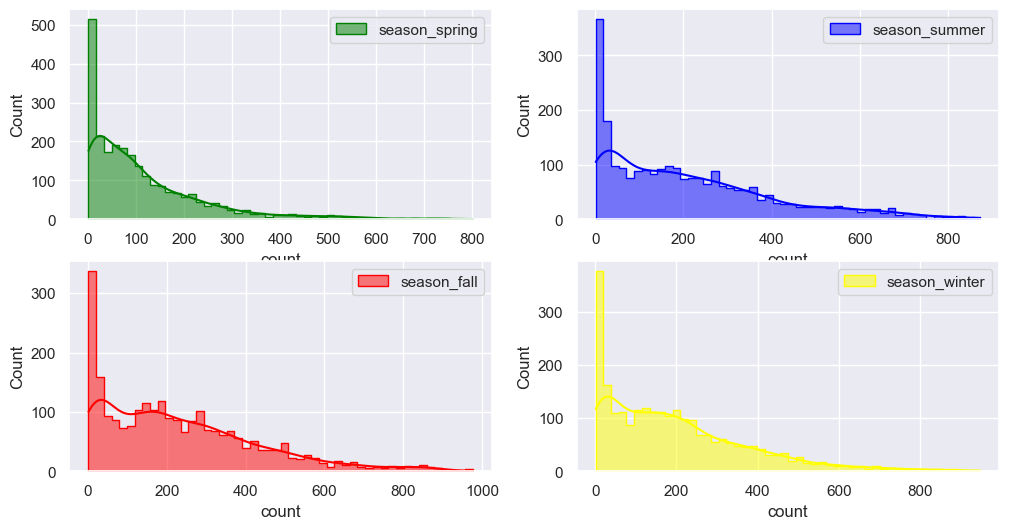

In [100]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(season1["count"].sample(2500), bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(season2["count"].sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(season3["count"].sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(season4["count"].sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.show()

* **checking the assuption if distribution follow gaussian**

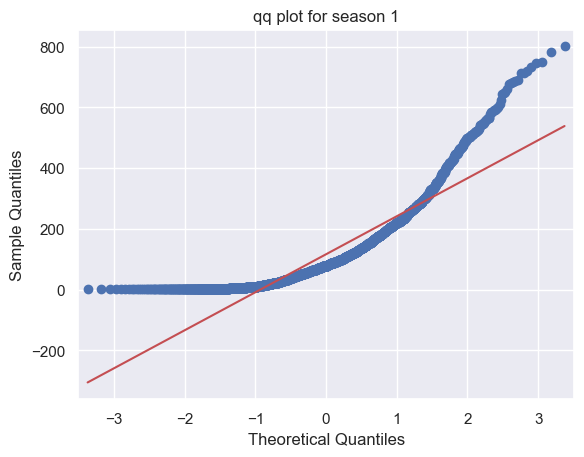

In [101]:
qqplot(season1["count"], line="s")
plt.title("qq plot for season 1")
plt.show()

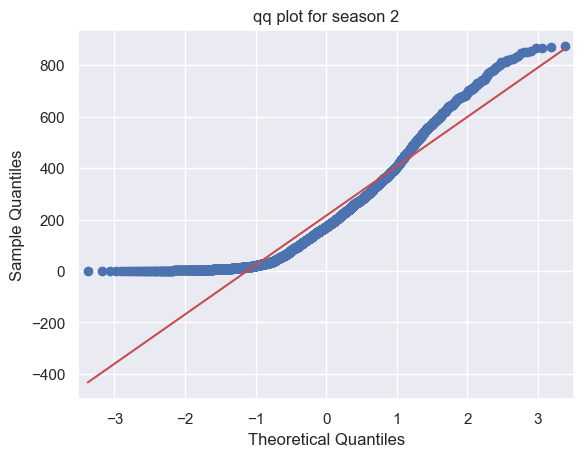

In [102]:
qqplot(season2["count"], line="s")
plt.title("qq plot for season 2")
plt.show()

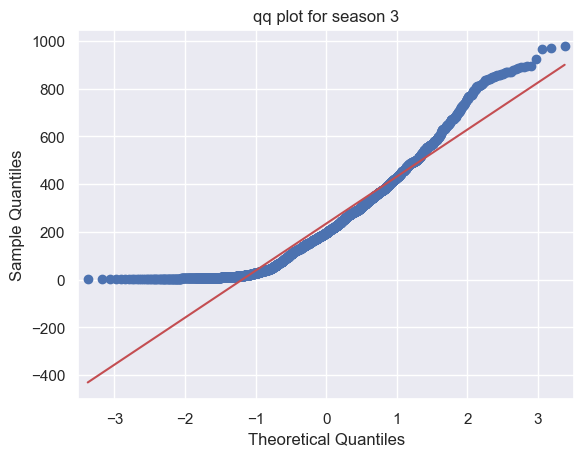

In [103]:
qqplot(season3["count"], line="s")
plt.title("qq plot for season 3")
plt.show()

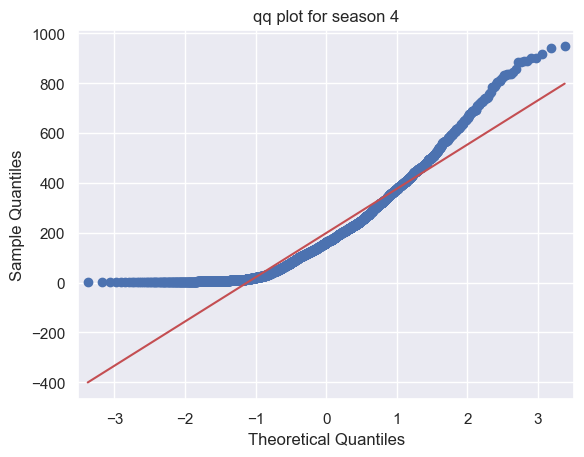

In [104]:
qqplot(season4["count"], line="s")
plt.title("qq plot for season 4")
plt.show()

* **from above four qqplot we can see distribution is not gaussian**

**shapiro test**

In [105]:
# for season 1
# checking if gaussian with shapiro test
# setting significance = 0.05

# H0 : Data is Gaussian
# Ha : Data is not Gaussian
count_subset= season1["count"].sample(100)          # taking random sample of size 100

test_stat, p_value = shapiro(count_subset)
print(p_value)
if p_value<0.05:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

1.0997904843768058e-11
Data is not Gaussian


In [106]:
# for season 2
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
count_subset= season2["count"].sample(100)          # taking random sample of size 100

test_stat, p_value = shapiro(count_subset)
print(p_value)
if p_value<0.05:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

2.7417721426559183e-08
Data is not Gaussian


In [107]:
# for season 3
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
count_subset= season3["count"].sample(100)          # taking random sample of size 100

test_stat, p_value = shapiro(count_subset)
print(p_value)
if p_value<0.05:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

2.8440790629247203e-06
Data is not Gaussian


In [108]:
# for season 4
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
count_subset= season4["count"].sample(100)          # taking random sample of size 100

test_stat, p_value = shapiro(count_subset)
print(p_value)
if p_value<0.05:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

8.679466191097163e-06
Data is not Gaussian


*  **Checking Homogeneity of variance using Levene's test**

In [109]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(season1["count"], season2["count"], season3["count"], season4["count"] )
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("variance are equal")

1.0147116860043298e-118
Variances are not equal


*  from above all test it is clear that data is not normally distributed.
*  does not have the same variance.
*  we cannot perform annova test.
*  We can Kruskal-Wallis test for independent samples.

In [110]:
# Ho : Avg no. of cycles rented is same for different season, Fail to reject NUll hypothesis.
# Ha :  AVg no. of cycles rented is different for different season, Reject Ho.

stat, pval= kruskal(season1["count"], season2["count"], season3["count"], season4["count"] )
print(pval)

if pval<0.05:
  print(" Avg no. of cycles rented is different for different season, Null hypothesis Rejected")
else:
  print("Avg no. of cycles rented is same for different season, Fail to reject NUll hypothesis")


2.479008372608633e-151
 Avg no. of cycles rented is different for different season, Null hypothesis Rejected


* Hence the average number of rental bikes is statistically different for different season.

## Hypothesis Testing 4
*   **is Weather is dependent on the season?**

In [111]:
df[["weather", "season"]].describe()

weather  season
count     10886   10886
unique        4       4
top           1       4
freq       7192    2734

* **It is clear that season and weather both are categorical features**

*  **Null Hypothesis ( H0 ) - weather is independent of season**

*  **Alternate Hypothesis ( HA ) - weather is dependent of seasons.**

Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.
* We set our alpha to be 0.05

In [112]:
contingency = pd.crosstab(index = df['season'],
                          columns = df['weather'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0)
contingency

weather         1         2        3      4
season                                     
1        223009.0   76406.0  12919.0  164.0
2        426350.0  134177.0  27755.0    0.0
3        470116.0  139386.0  31160.0    0.0
4        356588.0  157191.0  30255.0    0.0

*  Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [113]:
# The contingency table for a particular season and weather such that each value is the total number of total bikes rented.
contingency = pd.crosstab(index = df['season'],
                          columns = df['weather'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0).to_numpy()[:, :3]
contingency

array([[223009.,  76406.,  12919.],
       [426350., 134177.,  27755.],
       [470116., 139386.,  31160.],
       [356588., 157191.,  30255.]])

In [115]:
chi_test_stat, p_value, dof, expected = chi2_contingency(observed = contingency)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value,"\n")
print("Expected : '\n'", expected)

Test Statistic = 10838.372332480214
p value = 0.0 

Expected : '
' [[221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [453484.88557396 155812.72247031  31364.39195574]
 [385087.91880639 132312.23118651  26633.8500071 ]]


*   Comparing p value with significance level

In [116]:
if p_value < 0.05:
    print("Reject H0")
    print("weather is dependent of seasons")
else:
  print("weather is independent of seasons")

Reject H0
weather is dependent of seasons


* **There is statistically significant dependency of weather and season based on the number of number of bikes rented.**

## Insights:

* The data is given from 2011-01-01 to 2012-12-19. The total time period for which the data is given is '718 days.
* There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.

* Out of every 100 users, around 19 are casual users and 81 are registered users.
* The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

* The average hourly count of rental bikes is the lowest in the month of January followed by February and March.

* More than 80 % of the time, the temperature is less than 28 degrees celcius.
* More than 80 % of the time, the humidity value is greater than 40. Thus for  most of the time, humidity level varies from optimum to too moist.
* More than 85 % of the total, windspeed data has a value of less than 20.

* There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.

* The avg number of rental bikes is statistically different for different seasons and weather.

## Recommendations:
* Changes According to weather:
    1.  Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.
    2. Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.
    3. wse can Collaborate with weather services to improve knowlege about weather

* Seasonal changes:
   1. Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.
   2. As seen seasonal demand changes so focus on can maintaining bikes more during spring and summer seasons

* With approximately 81% of users registered and the remaining 19% classified as casual users, Yulu can effectively customize its marketing and communication strategies. For registered users, Yulu can implement loyalty programs, exclusive offers, or personalized recommendations to encourage repeat business. On the other hand, for casual users, the focus should be on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

* By analyzing the demand patterns of different months, such as January, February, and March, Yulu can appropriately adjust its inventory levels. This allows for avoiding excess bikes during months with lower rental counts and ensuring there are enough bikes available during peak months to meet the higher demand.

* Encouraging customers to provide feedback and reviews on their biking experience can be beneficial for Yulu. This feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.


* Utilizing social media platforms, Yulu can effectively promote its electric bike rental services. Sharing captivating visuals of biking experiences in different weather conditions, highlighting customer testimonials, and engaging with potential customers through interactive posts and contests can all contribute to increased visibility. Additionally, targeted advertising campaigns can be implemented to reach specific customer segments and drive more bookings.




